In [1]:
import json
import glob
import os
import pandas as pd
path = 'C:/Users/zmads/_workspace/python/IBM Workbooks/FoxStudios/Deadpool2/ModelScores/ImageViolenceClassifier/'
boblist = []
for filename in glob.glob(os.path.join(path, '*.json')):
    with open(filename) as file:
        data = file.read()
        jsondata = json.loads(data)
        foxclass = filename.split('\\')[-1][4:-9]         
        classname = 'None'
        confidence = 0.0
        xmax = 0
        xmin = 0
        ymin = 0
        ymax = 0
        if type(jsondata) ==  type(None):
            #print filename
            print(filename.split('\\')[-1], foxclass, classname, jsondata['classified'][item] ) 
        else:
            if (jsondata['result'] == 'fail'):
                #print filename
                print(filename.split('\\')[-1], foxclass, classname, jsondata['classified'][item] )
            else:
                if (len(jsondata['classified']) == 0):
                    #print filename
                    print(filename.split('\\')[-1], foxclass, classname, jsondata['classified'][item] )
                else:
                    for item in jsondata['classified']:   
                        classname = item
                        subclassname = item
                        value = jsondata['classified'][item] 
                        nameDict = {
                            'Nud_S': 'Nuds',
                            'Smoking_Drugs': 'Smok',
                            'Violence': 'Violence',
                            'Expletive': 'Expletive',
                            'None': 'None',
                            '_negative_': 'None'
                                }
                        boblist.append((filename.split('\\')[-1], foxclass, nameDict[subclassname], value))
                        #print(filename.split('\\')[-1], foxclass, classname, value)
columns = ['filename', 'FoxClass', 'ModelClass', 'Score']
ImageViolenceClassifier = pd.DataFrame(boblist, columns = columns)  





In [2]:
ImageViolenceClassifier.head()

,filename,FoxClass,ModelClass,Score
0,0001Smok0001.json,Smok,Smok,0.98846
1,0001Smok0002.json,Smok,Smok,0.98872
2,0001Smok0004.json,Smok,Smok,0.98841
3,0001Smok0005.json,Smok,Smok,0.97404
4,0001Smok0006.json,Smok,Smok,0.68780


# Utils for Reporting Metrics

From https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

In [3]:
# for Violence Class
def calc_metrics(tp_rowcol, cm):
    # this works only for col 0, row 0 for now 
    #will troubleshoot other columns later
    # so its works for Violence but i have not generalized the cal to accomdate other row,col as the tp

    tmp = 0
    tp_rowcol = -tp_rowcol
    tmp = np.roll(cm, tp_rowcol, axis=1)
    cm = np.roll(tmp, tp_rowcol, axis=0)  

    L = len(cm)
    tp = cm[0][0]
    fn = sum(cm[0][1:L])
    fp = sum(cm, axis = 0)[0] - tp
    ftn = sum(cm, axis = 0) - cm[0]
    tn = sum(cm[1:L,1:L])
    sensitivity_recall =  tp  / (tp + fn + 0.)
    specificity =  tn / (tn + fp + 0.)
    precision =  tp / (tp + fp + 0.)
    accuracy =  (tp+tn+ 0.)/(tp+fp+fn+tn + 0.)
    f1 = 2.0*precision*sensitivity_recall/(precision+sensitivity_recall)
    return(accuracy, precision, sensitivity_recall, specificity, f1)
def print_metrics(accuracy, precision, sensitivity_recall, specificity, f1):
    print 'accuracy: ', accuracy
    print 'sensitivity_recall: ',sensitivity_recall
    print 'specificity: ', specificity
    print 'precision: ', precision
    print 'f1: ', f1
def metricsAsDataframe(accuracy, precision, sensitivity_recall, specificity, f1):
    data = [{'metric': 'accuracy', 'Value': accuracy, 'Description': '(tp+tn)/(tp+fp+fn+tn)'},
             {'metric': 'precision',  'Value': precision, 'Description': 'tp/(tp+fp)' },
             {'metric': 'sensitivity_recall',  'Value': sensitivity_recall, 'Description': 'tp  / (tp + fn)'},
             {'metric': 'specificity',  'Value': specificity,  'Description': 'tn / (tn + fp)'},
            {'metric': 'F1',  'Value': f1,  'Description': '2*precision*recall/(precision+recall)'}]
    dfObj = pd.DataFrame(data, columns=['metric', 'Value', 'Description'])
    return dfObj

# Confusion Matrix for Deadpool2¶


In [4]:
df = ImageViolenceClassifier

[[2394    0    0  100   61]
 [ 352    0    0  273   14]
 [ 107    0    0   67    9]
 [  44    0    0  389    6]
 [   9    0    0    3  152]]


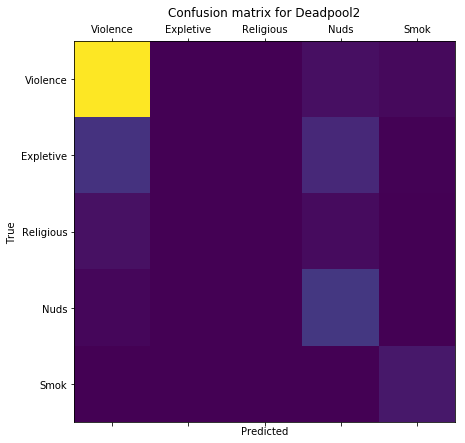

In [5]:
%matplotlib inline
import matplotlib as plt
from matplotlib import *
import sys
from pylab import *
from sklearn.metrics import confusion_matrix
#mlist = ['Predator']
mlist = ['Deadpool2']
#mlist = ['Predator', 'Deadpool2']
#df = result
y_true = df['FoxClass'].values.tolist()
y_pred = df['ModelClass'].values.tolist()

myset = set(y_true)
labels = list(myset)

labels = ['Violence', 'Expletive', 'Religious', 'Nuds', 'Smok']
cm = confusion_matrix(y_true, y_pred, labels)
cmd = cm.copy()
print(cm)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix for %s'%(mlist[0]))
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Violence predictor metrics for Deadpool2

In [6]:
accuracy, precision, sensitivity_recall, specificity, F1 = calc_metrics(0,cmd)

ImageViolenceClassifier = metricsAsDataframe(accuracy, precision, sensitivity_recall, specificity, F1 )
ImageViolenceClassifier


,metric,Value,Description
0,accuracy,0.830905,(tp+tn)/(tp+fp+fn+tn)
1,precision,0.823813,tp/(tp+fp)
2,sensitivity_recall,0.936986,tp / (tp + fn)
3,specificity,0.640702,tn / (tn + fp)
4,F1,0.876762,2*precision*recall/(precision+recall)


# Predator scores

In [73]:
import json
import glob
import os
import pandas as pd
path = 'C:/Users/zmads/_workspace/python/IBM Workbooks/FoxStudios/Predator/ModelScores/VideoImageBased/ImageViolenceClass/'
boblist = []
for filename in glob.glob(os.path.join(path, '*.json')):
    with open(filename) as file:
        data = file.read()
        jsondata = json.loads(data)
        foxclass = filename.split('\\')[-1][4:-9]         
        classname = 'None'
        confidence = 0.0
        xmax = 0
        xmin = 0
        ymin = 0
        ymax = 0
        if type(jsondata) ==  type(None):
            #print filename
            print(filename.split('\\')[-1], foxclass, classname, jsondata['classified'][item] ) 
        else:
            if (jsondata['result'] == 'fail'):
                #print filename
                print(filename.split('\\')[-1], foxclass, classname, jsondata['classified'][item] )
            else:
                if (len(jsondata['classified']) == 0):
                    #print filename
                    print(filename.split('\\')[-1], foxclass, classname, jsondata['classified'][item] )
                else:
                    for item in jsondata['classified']:   
                        classname = item
                        subclassname = item
                        value = jsondata['classified'][item] 
                        nameDict = {
                            'Nud_S': 'Nuds',
                            'Smoking_Drugs': 'Smok',
                            'Violence': 'Violence',
                            'Expletive': 'Expletive',
                            'None': 'None',
                            '_negative_': 'None'
                                }
                        boblist.append((filename.split('\\')[-1], foxclass, nameDict[subclassname], value))
                        #print(filename.split('\\')[-1], foxclass, classname, value)
columns = ['filename', 'FoxClass', 'ModelClass', 'Score']
PredatorImageViolenceClassifier = pd.DataFrame(boblist, columns = columns)  





In [75]:
PredatorImageViolenceClassifier.head()

,filename,FoxClass,ModelClass,Score
0,0001Violence0001.json,Violence,Violence,0.81324
1,0001Violence0002.json,Violence,Smok,0.57265
2,0001Violence0003.json,Violence,Violence,0.80089
3,0001Violence0004.json,Violence,Violence,0.74114
4,0001Violence0005.json,Violence,Violence,0.69303


In [76]:
df = PredatorImageViolenceClassifier

[[660   0   0 712 203]
 [186   0   0 309  76]
 [ 10   0   0  34  13]
 [104   0   0 101  22]
 [128   0   0 279  93]]


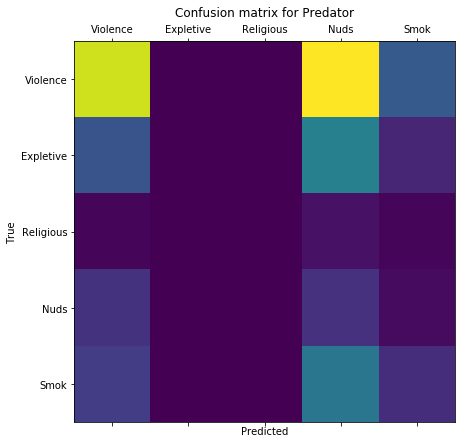

In [77]:
%matplotlib inline
import matplotlib as plt
from matplotlib import *
import sys
from pylab import *
from sklearn.metrics import confusion_matrix
mlist = ['Predator']
#mlist = ['Deadpool2']
#mlist = ['Predator', 'Deadpool2']
#df = result
y_true = df['FoxClass'].values.tolist()
y_pred = df['ModelClass'].values.tolist()

myset = set(y_true)
labels = list(myset)

labels = ['Violence', 'Expletive', 'Religious', 'Nuds', 'Smok']
cm = confusion_matrix(y_true, y_pred, labels)
cmd = cm.copy()
print(cm)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix for %s'%(mlist[0]))
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Violence predictor metrics for Predator


In [78]:
accuracy, precision, sensitivity_recall, specificity, F1 = calc_metrics(0,cmd)

ImageViolenceClassifier = metricsAsDataframe(accuracy, precision, sensitivity_recall, specificity, F1 )
ImageViolenceClassifier


,metric,Value,Description
0,accuracy,0.541638,(tp+tn)/(tp+fp+fn+tn)
1,precision,0.606618,tp/(tp+fp)
2,sensitivity_recall,0.419048,tp / (tp + fn)
3,specificity,0.684133,tn / (tn + fp)
4,F1,0.495682,2*precision*recall/(precision+recall)


# Nudity/Sexual Content predictor metrics for Predator


In [79]:
accuracy, precision, sensitivity_recall, specificity, F1 = calc_metrics(3,cmd)

ImageViolenceClassifier = metricsAsDataframe(accuracy, precision, sensitivity_recall, specificity, F1 )
ImageViolenceClassifier


,metric,Value,Description
0,accuracy,0.501706,(tp+tn)/(tp+fp+fn+tn)
1,precision,0.070383,tp/(tp+fp)
2,sensitivity_recall,0.444934,tp / (tp + fn)
3,specificity,0.506474,tn / (tn + fp)
4,F1,0.121540,2*precision*recall/(precision+recall)
